<a href="https://colab.research.google.com/github/Anjaligurram/ibm/blob/main/Videotodataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

In [ ]:
import cv2
import os

# Create a folder to store frames
output_folder = "frames_dataset"
os.makedirs(output_folder, exist_ok=True)

# Open the video file
video_path = "/ibmvideo.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Save the frame as an image
    frame_filename = os.path.join(output_folder, f"frame_{frame_count:04d}.jpg")
    cv2.imwrite(frame_filename, frame)

    frame_count += 1

    # Break the loop after a certain number of frames (if needed)
    # if frame_count == 100:
    #     break

cap.release()
cv2.destroyAllWindows()

print(f"Converted {frame_count} frames and saved to '{output_folder}' folder.")


Converted 316 frames and saved to 'frames_dataset' folder.


In [ ]:
from google.colab import files
import shutil

shutil.make_archive("/content/frames_dataset", 'zip', "frames_dataset")
files.download("/content/frames_dataset.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import shutil

# Create a directory for the organized frames
output_directory = "frames_dataset"
os.makedirs(output_directory, exist_ok=True)

# List all the frames in the current directory
frame_files = [filename for filename in os.listdir() if filename.endswith('.jpg')]

# Create class subdirectories and move frames to appropriate subdirectories
for filename in frame_files:
    # Determine class based on filename, e.g., classA_frame_0001.jpg
    class_name = filename.split('_')[0]

    # Create class subdirectory if it doesn't exist
    class_dir = os.path.join(output_directory, class_name)
    os.makedirs(class_dir, exist_ok=True)

    # Move the frame to the class subdirectory
    shutil.move(filename, os.path.join(class_dir, filename))

print("Frames organized into class-specific subdirectories.")


Frames organized into class-specific subdirectories.


In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import shutil

# Define the list of classes
classes = ["classA", "classB"]

# Create the frames_dataset directory if it doesn't exist
output_directory = "frames_dataset"
os.makedirs(output_directory, exist_ok=True)

# Loop through each class and create a subdirectory
for class_name in classes:
    class_directory = os.path.join(output_directory, class_name)
    os.makedirs(class_directory, exist_ok=True)

# List all the frames in the current directory
frame_files = [filename for filename in os.listdir() if filename.endswith('.jpg')]

# Organize frames into class subdirectories
for filename in frame_files:
    # Determine class based on filename, e.g., classA_frame_0001.jpg
    class_name = filename.split('_')[0]
    if class_name in classes:
        target_directory = os.path.join(output_directory, class_name)
        shutil.move(filename, os.path.join(target_directory, filename))

print("Frames organized into class-specific subdirectories within frames_dataset.")


Frames organized into class-specific subdirectories within frames_dataset.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
image_height = 224  # Set the desired height
image_width = 224   # Set the desired width
batch_size = 32

# Create an ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    # You can add more augmentation options here
)

# Load training data using the generator
train_generator = train_datagen.flow_from_directory(
    "frames_dataset",  # Path to the directory with organized frames
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode="binary"  # Use "categorical" for multi-class classification
)

# Example: Printing the class indices
print("Class Indices:", train_generator.class_indices)

# Now you can use train_generator to train your machine learning model
# For example:
# model.fit(train_generator, ...)



Found 0 images belonging to 2 classes.
Class Indices: {'classA': 0, 'classB': 1}


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical

# Define constants
num_frames_per_clip = 16
image_height = 112
image_width = 112

def load_and_preprocess_clip(clip_path):
    clip_frames = []
    for frame_name in sorted(os.listdir(clip_path)):
        if frame_name.endswith('.jpg'):
            frame_path = os.path.join(clip_path, frame_name)
            frame = cv2.imread(frame_path)
            frame = cv2.resize(frame, (image_width, image_height))
            clip_frames.append(frame)
            if len(clip_frames) == num_frames_per_clip:
                break
    return np.array(clip_frames)

# Load video clips and labels
data = []
labels = []

class_names = sorted(os.listdir("frames_dataset"))

for class_name in class_names:
    class_dir = os.path.join("frames_dataset", class_name)
    if os.path.isdir(class_dir):
        class_label = class_names.index(class_name)  # Assign class label based on class_names list
        for clip_name in os.listdir(class_dir):
            clip_path = os.path.join(class_dir, clip_name)
            clip_frames = load_and_preprocess_clip(clip_path)
            data.append(clip_frames)
            labels.append(class_label)

data = np.array(data)
labels = np.array(labels)
num_classes = len(class_names)
labels_categorical = to_categorical(labels, num_classes=num_classes)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout

model = Sequential([
    Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(num_frames_per_clip, image_height, image_width, 3)),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Conv3D(64, kernel_size=(3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical format
num_classes = 2
labels_categorical = to_categorical(labels, num_classes=num_classes)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout

model = Sequential([
    Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(num_frames_per_clip, image_height, image_width, 3)),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Conv3D(64, kernel_size=(3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
!pip install scikit-learn


In [ ]:
import os
import numpy as np
import cv2

# Define constants
num_frames_per_clip = 16  # Number of frames per video clip
image_height = 112        # Set your desired image dimensions
image_width = 112

def load_and_preprocess_clip(clip_path):
    clip_frames = []
    for frame_name in sorted(os.listdir(clip_path)):
        if frame_name.endswith('.jpg'):
            frame_path = os.path.join(clip_path, frame_name)
            frame = cv2.imread(frame_path)
            frame = cv2.resize(frame, (image_width, image_height))
            clip_frames.append(frame)
            if len(clip_frames) == num_frames_per_clip:
                break
    return np.array(clip_frames)

# Load frames from classB directory
classB_frames = []
classB_dir = os.path.join("frames_dataset", "classB")

for clip_name in os.listdir(classB_dir):
    clip_path = os.path.join(classB_dir, clip_name)
    clip_frames = load_and_preprocess_clip(clip_path)
    classB_frames.append(clip_frames)

classB_data = np.array(classB_frames)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout

num_classes = 2  # Two classes: classA and classB

model = Sequential([
    Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(num_frames_per_clip, image_height, image_width, 3)),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Conv3D(64, kernel_size=(3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 44.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)


In [ ]:
model = Sequential([
    Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(num_frames_per_clip, image_height, image_width, 3)),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Conv3D(64, kernel_size=(3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Flatten(),  # Flatten the output before the Dense layers
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


In [ ]:
# Convert labels to categorical format
classB_labels = np.zeros(len(classB_frames))  # Label 0 for classB
classB_labels_categorical = to_categorical(classB_labels, num_classes=num_classes)



In [ ]:
# Create and compile the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

num_classes = 2  # Two classes: classA and classB

model = Sequential([
    Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(num_frames_per_clip, image_height, image_width, 3)),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Conv3D(64, kernel_size=(3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train and test


Loading dataset

In [ ]:
!pip install matplotlib


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Specify the path to the classB frames
classB_dir = os.path.join("frames_dataset", "classB")

# Load and visualize frames from classB
for clip_name in os.listdir(classB_dir):
    clip_path = os.path.join(classB_dir, clip_name)
    frame_paths = [os.path.join(clip_path, frame_name) for frame_name in sorted(os.listdir(clip_path)) if frame_name.endswith('.jpg')]

    for frame_path in frame_paths:
        frame = cv2.imread(frame_path)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(frame)
        plt.axis('off')
        plt.show()


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import time  # Import the time module

# Specify the path to the classB frames
classB_dir = os.path.join("frames_dataset", "classB")

# Load and visualize frames from classB
for clip_name in os.listdir(classB_dir):
    clip_path = os.path.join(classB_dir, clip_name)
    frame_paths = [os.path.join(clip_path, frame_name) for frame_name in sorted(os.listdir(clip_path)) if frame_name.endswith('.jpg')]

    for frame_path in frame_paths:
        print("Loading frame:", frame_path)
        frame = cv2.imread(frame_path)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame)
        plt.axis('off')
        plt.show()
        time.sleep(100000)  # Add a delay of 1 second between frames


In [ ]:
import os
import cv2

classB_dir = os.path.join("frames_dataset", "classB")

for clip_name in os.listdir(classB_dir):
    clip_path = os.path.join(classB_dir, clip_name)
    frame_paths = [os.path.join(clip_path, frame_name) for frame_name in sorted(os.listdir(clip_path)) if frame_name.endswith('.jpg')]

    for frame_path in frame_paths:
        print("Loading frame:", frame_path)
        frame = cv2.imread(frame_path)
        cv2.imshow("Frame", frame)
        cv2.waitKey(1000)  # Display for 1 second (1000 milliseconds)
        cv2.destroyAllWindows()


In [ ]:
import os
import cv2
import numpy as np
import pickle

# Define constants
image_height = 112
image_width = 112

# Specify paths to your frames and labels
frames_folder = "frames_dataset"
class_names = os.listdir(frames_folder)

# Initialize arrays to store data and labels
data = []
labels = []

# Load and preprocess frames
for class_name in class_names:
    class_dir = os.path.join(frames_folder, class_name)
    if os.path.isdir(class_dir):
        class_label = class_name  # Use the class name directly as the label
        for clip_name in os.listdir(class_dir):
            clip_path = os.path.join(class_dir, clip_name)
            frame_paths = [os.path.join(clip_path, frame_name) for frame_name in sorted(os.listdir(clip_path)) if frame_name.endswith('.jpg')]
            clip_frames = []
            for frame_path in frame_paths:
                frame = cv2.imread(frame_path)
                frame = cv2.resize(frame, (image_width, image_height))
                clip_frames.append(frame)
            data.append(clip_frames)
            labels.append(class_label)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Save the dataset
dataset_filename = "frames_dataset.pkl"
with open(dataset_filename, 'wb') as file:
    pickle.dump((data, labels), file)

print("Dataset saved as", dataset_filename)


Dataset saved as frames_dataset.pkl


In [ ]:
# Load the dataset
dataset_filename = "/content/frames_dataset.pkl"
with open(dataset_filename, 'rb') as file:
    data, labels = pickle.load(file)

# Print the shape of data and labels
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

# Check if data is empty or contains actual clips
if data.shape[0] == 0:
    print("No data found in the dataset.")
else:
    # Assuming data contains frames organized as clips and each clip has multiple frames
    # You can visualize a random clip of frames
    random_clip_index = np.random.randint(0, data.shape[0])
    random_clip_frames = data[random_clip_index]

    plt.figure(figsize=(10, 6))
    for i, frame in enumerate(random_clip_frames):
        plt.subplot(1, len(random_clip_frames), i + 1)
        plt.imshow(frame)
        plt.axis('off')
    plt.show()

    print("Class label:", labels[random_clip_index])


Data shape: (0,)
Labels shape: (0,)
No data found in the dataset.


In [ ]:
import os
import cv2
import numpy as np
import pickle

# Load frames and organize data and labels
data = []
labels = []

class_names = os.listdir("frames_dataset")
for class_name in class_names:
    class_dir = os.path.join("frames_dataset", class_name)
    if os.path.isdir(class_dir):
        for clip_name in os.listdir(class_dir):
            clip_path = os.path.join(class_dir, clip_name)
            frame_paths = [os.path.join(clip_path, frame_name) for frame_name in sorted(os.listdir(clip_path)) if frame_name.endswith('.jpg')]
            clip_frames = []
            for frame_path in frame_paths:
                frame = cv2.imread(frame_path)
                frame = cv2.resize(frame, (112, 112))
                clip_frames.append(frame)
            data.append(clip_frames)
            labels.append(class_name)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Save the dataset as a pickle file
with open("new_frames_dataset.pkl", 'wb') as file:
    pickle.dump((data, labels), file)

print("New pickle dataset saved.")


New pickle dataset saved.


In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load the new pickle dataset
new_dataset_filename = "new_frames_dataset.pkl"
with open(new_dataset_filename, 'rb') as file:
    data, labels = pickle.load(file)

# Check if data is empty or has valid shape
if data.shape[0] == 0:
    print("No data found in the dataset.")
else:
    # Assuming data contains frames organized as clips and each clip has multiple frames
    # Let's visualize a random clip of frames
    random_clip_index = np.random.randint(0, data.shape[0])
    random_clip_frames = data[random_clip_index]

    plt.figure(figsize=(10, 6))
    for i, frame in enumerate(random_clip_frames):
        plt.subplot(1, len(random_clip_frames), i + 1)
        plt.imshow(frame)
        plt.axis('off')
    plt.show()

    print("Class label:", labels[random_clip_index])


No data found in the dataset.


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GRU, Dense, TimeDistributed

# Load and preprocess frames
def load_and_preprocess_frames(frames_folder):
    frames = []
    for frame_name in sorted(os.listdir(frames_folder)):
        if frame_name.endswith('.jpg'):
            frame_path = os.path.join(frames_folder, frame_name)
            frame = cv2.imread(frame_path)
            frame = cv2.resize(frame, (224, 224))  # Resize for VGG16 input
            frame = frame / 255.0  # Normalize pixel values
            frames.append(frame)
    return np.array(frames)

frames_folder = "frames_dataset"
frames_data = load_and_preprocess_frames(frames_folder)

# Build CNN model
cnn_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features using CNN model
features = cnn_model.predict(frames_data)

# Build GRU model
gru_model = keras.Sequential([
    GRU(128, return_sequences=True, input_shape=(features.shape[1], features.shape[2])),
    GRU(128, return_sequences=True),
    TimeDistributed(Dense(vocabulary_size, activation='softmax'))
])

# Compile the model
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (you will need labels)
gru_model.fit(features, labels, epochs=10, batch_size=32)

# Generate text predictions
predictions = gru_model.predict(features)


AssertionError: ignored

In [ ]:
pip install tensorflow==<desired_version>


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install tensorflow==<desired_version>'


In [ ]:
pip install --upgrade tensorflow


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten

# Load and preprocess frames
def load_and_preprocess_frames(frames_folder):
    frames = []
    for frame_name in sorted(os.listdir(frames_folder)):
        if frame_name.endswith('.jpg'):
            frame_path = os.path.join(frames_folder, frame_name)
            frame = cv2.imread(frame_path)
            frame = cv2.resize(frame, (224, 224))  # Resize for VGG16 input
            frame = frame / 255.0  # Normalize pixel values
            frames.append(frame)
    return np.array(frames)

frames_folder = "frames_dataset/classB"
frames_data = load_and_preprocess_frames(frames_folder)

# Build CNN model
cnn_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
cnn_model.trainable = False  # Freeze the layers to avoid retraining

model = keras.Sequential([
    cnn_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # num_classes is the number of classes in your task
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare labels for each frame (you need to implement this based on your data)
# labels = ...

# Train the model
model.fit(frames_data, labels, epochs=10, batch_size=32)

# Generate predictions for each frame
predictions = model.predict(frames_data)


AssertionError: ignored

In [ ]:
import os
import cv2
import numpy as np

def load_and_preprocess_frames(frames_folder):
    frames = []
    for frame_name in sorted(os.listdir(frames_folder)):
        if frame_name.endswith('.jpg'):
            frame_path = os.path.join(frames_folder, frame_name)
            frame = cv2.imread(frame_path)
            frame = cv2.resize(frame, (224, 224))  # Resize frames to a common size
            frame = frame / 255.0  # Normalize pixel values to [0, 1]
            frames.append(frame)
    return np.array(frames)

frames_folder = "frames_dataset/classB"
frames_data = load_and_preprocess_frames(frames_folder)


In [ ]:
pip install keras_applications


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.3 MB/s eta 0:00:00


In [ ]:
pip install tensorflow


In [ ]:

from tensorflow.keras.applications import VGG16

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global average pooling layer  from tensorflow.keras.applications import VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with softmax activation for classification
predictions = Dense(num_classes, activation='softmax')(x)

# Create the CNN model
cnn_model = Model(inputs=base_model.input, outputs=predictions)

AssertionError: ignored

In [ ]:
import matplotlib.pyplot as plt

# Assuming frames_data contains your preprocessed frames

num_frames = len(frames_data)

for i in range(num_frames):
    plt.imshow(frames_data[i])
    plt.title(f"Frame {i}")
    plt.axis('off')
    plt.show()


In [ ]:
import tensorflow as tf

# Define your dataset paths
train_tfrecord_path = 'train.tfrecord'
validation_tfrecord_path = 'validation.tfrecord'
test_tfrecord_path = 'test.tfrecord'

# Define a function to parse TFRecords
def parse_tfrecord_fn(example):
    feature_description = {
        'image': tf.io.FixedLenFeature([], tf.string),
        'label': tf.io.FixedLenFeature([], tf.int64)
    }
    example = tf.io.parse_single_example(example, feature_description)
    image = tf.image.decode_image(example['image'])
    label = example['label']
    return image, label

# Create a function to load TFRecords into a dataset
def load_dataset(tfrecord_path):
    dataset = tf.data.TFRecordDataset(tfrecord_path)
    dataset = dataset.map(parse_tfrecord_fn)
    return dataset

# Load your TFRecord datasets
train_dataset = load_dataset(train_tfrecord_path)
validation_dataset = load_dataset(validation_tfrecord_path)
test_dataset = load_dataset(test_tfrecord_path)

# Define your model (replace with your own model architecture)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)),
    # Add more layers as needed
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
steps_per_epoch = len(train_dataset) // batch_size

model.fit(train_dataset.batch(batch_size), epochs=epochs, validation_data=validation_dataset.batch(batch_size))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset.batch(batch_size))
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

NameError: ignored

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Assuming 'frames_dataset' is a list of file paths to frames
frames_dataset = ["/content/frames_dataset/frame_0000.jpg","/content/frames_dataset/frame_0035.jpg"]

# Load frames and convert to suitable format
frame_images = [img_to_array(load_img(frame_path)) for frame_path in frames_dataset]

# Convert the list of images to a NumPy array
frame_data = np.array(frame_images)

# Create a TensorFlow Dataset
frame_dataset = tf.data.Dataset.from_tensor_slices(frame_data)

# Now you can use 'frame_dataset' with TensorFlow for training or other purposes


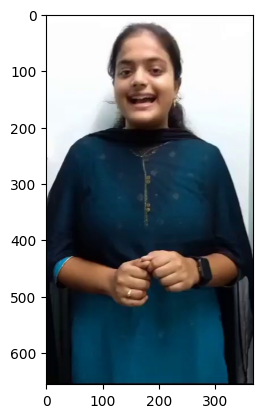

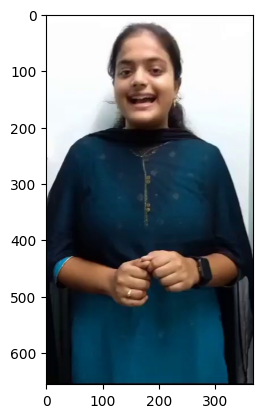

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Assuming you have already created 'frame_dataset' using the previous code

# Choose the number of frames you want to view
num_frames_to_view = 2

for _ in range(num_frames_to_view):
    # Recreate the iterator to start from the beginning each time
    iterator = frame_dataset.__iter__()

    frame = iterator.get_next()  # Get the next frame
    plt.imshow(frame.numpy().astype("uint8"))
    plt.show()


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Assuming you have already created 'frame_dataset' using the previous code

# Convert the dataset to a list of flattened frame arrays
frame_list = [frame.numpy().flatten() for frame in frame_dataset]

# Create a Pandas DataFrame from the list
df = pd.DataFrame(frame_list)

# Display the DataFrame as a table
print(df)


   0       1       2       3       4       5       6       7       8       \
0     5.0     5.0     5.0     5.0     5.0     5.0     5.0     5.0     5.0   
1     3.0     3.0     3.0     3.0     3.0     3.0     3.0     3.0     3.0   

   9       ...  724214  724215  724216  724217  724218  724219  724220  \
0     5.0  ...     5.0     0.0     0.0     5.0     0.0     0.0     5.0   
1     3.0  ...     7.0     0.0     1.0     4.0     1.0     6.0     9.0   

   724221  724222  724223  
0     0.0     0.0     5.0  
1     0.0     1.0     4.0  

[2 rows x 724224 columns]
